In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [2]:
iris = load_iris()
X = iris.data


In [3]:
y = iris.target


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

clusters = kmeans.labels_


In [6]:
print("Inertia:", kmeans.inertia_)


Inertia: 191.02473685317958


In [7]:
print("Silhouette Score:", silhouette_score(X_scaled, clusters))


Silhouette Score: 0.4798814508199817


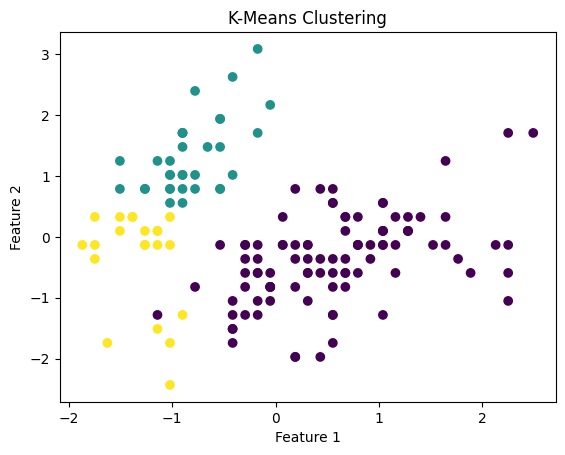

In [8]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering")
plt.show()


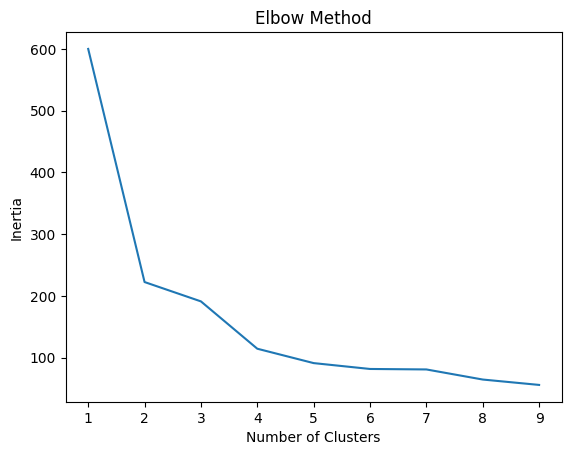

In [9]:
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


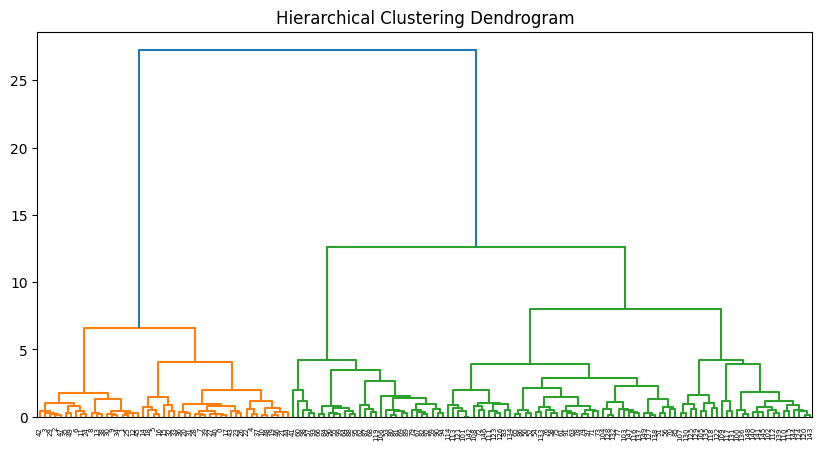

In [11]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


In [12]:
hc = AgglomerativeClustering(n_clusters=3)
hc_clusters = hc.fit_predict(X_scaled)


In [13]:
print("Silhouette Score:",
      silhouette_score(X_scaled, hc_clusters))


Silhouette Score: 0.4466890410285909


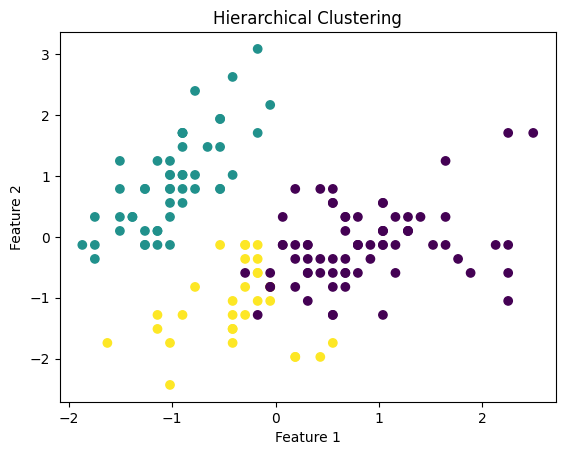

In [14]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hc_clusters)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Hierarchical Clustering")
plt.show()
